# Stress detection for IT professionals using machine learning

# **Importing Necessary Packages and Loading The Dataset**

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler


In [2]:
#Let's Load the data using panda library
df = pd.read_csv(r'stress_detection_IT_professionals_dataset.csv')

In [3]:
#Let's print the first 5 records of the data
df.head()

,Heart_Rate,Skin_Conductivity,Hours_Worked,Stress_Level,Emails_Sent,Meetings_Attended
0,126,5.56,9,67,25,4
1,159,5.89,10,69,55,5
2,64,4.58,11,26,45,1
3,165,5.10,14,65,19,3
4,58,5.23,9,32,47,0


In [4]:
#Let's print the last 5 records of the data
df.tail()

,Heart_Rate,Skin_Conductivity,Hours_Worked,Stress_Level,Emails_Sent,Meetings_Attended
2495,99,3.90,16,36,10,5
2496,53,4.21,16,49,19,3
2497,165,5.00,13,76,4,0
2498,164,4.84,10,75,15,2
2499,86,4.17,9,19,32,5


In [5]:
#Printing the shape of the dataset
df.shape

(2500, 6)

In [6]:
#Getting the data types of all the columns
df.dtypes

Heart_Rate             int64
Skin_Conductivity    float64
Hours_Worked           int64
Stress_Level           int64
Emails_Sent            int64
Meetings_Attended      int64
dtype: object

In [7]:
df.isnull().sum()

Heart_Rate           0
Skin_Conductivity    0
Hours_Worked         0
Stress_Level         0
Emails_Sent          0
Meetings_Attended    0
dtype: int64

**Here in our dataset we have both object and float data types.**

In [8]:
#check details about the data set
print("Here is the information about our data set which includes the number of columns, number of rows, data types , null counts and the memory size as well :")
df.info()

Here is the information about our data set which includes the number of columns, number of rows, data types , null counts and the memory size as well :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
Heart_Rate           2500 non-null int64
Skin_Conductivity    2500 non-null float64
Hours_Worked         2500 non-null int64
Stress_Level         2500 non-null int64
Emails_Sent          2500 non-null int64
Meetings_Attended    2500 non-null int64
dtypes: float64(1), int64(5)
memory usage: 117.3 KB


In [9]:
#Here is the unique values in our data
print("The unique values in each and every column in our data are as below:")
df.nunique()

The unique values in each and every column in our data are as below:


Heart_Rate           120
Skin_Conductivity    568
Hours_Worked           9
Stress_Level          73
Emails_Sent           52
Meetings_Attended      7
dtype: int64

In [10]:
print('The statistical information about our data set is as below :')
df.describe(include='all').T

The statistical information about our data set is as below :


,count,mean,std,min,25%,50%,75%,max
Heart_Rate,2500.0,109.186000,34.795766,50.00,79.00,109.00,140.0000,169.0000
Skin_Conductivity,2500.0,7.111728,3.350427,2.01,4.74,5.61,9.2745,15.2485
Hours_Worked,2500.0,11.995200,2.591267,8.00,10.00,12.00,14.0000,16.0000
Stress_Level,2500.0,50.598000,21.577865,15.00,32.00,49.00,70.0000,88.0000
Emails_Sent,2500.0,25.355600,14.758329,0.00,13.00,25.50,38.0000,55.0000
Meetings_Attended,2500.0,3.023200,2.001066,0.00,1.00,3.00,5.0000,6.0000


**The above table shows the statistical information about the each and every column of our data set.**

In [11]:
# Let's Check the duplicated values in our data
df.duplicated().sum()

0

**From the above we came to know that there is no duplicate values in our data set.**

# **Exploratory Data Analysis (EDA)**

In [12]:
#Let's check the null values present in the data set
df.isnull().sum()

Heart_Rate           0
Skin_Conductivity    0
Hours_Worked         0
Stress_Level         0
Emails_Sent          0
Meetings_Attended    0
dtype: int64

**From the above we found that there are some missing values in emp_title,emp_length,title, revol_util, mort_acc and Pub_rec_bankruptcies column**

# It creates a dataframe called 'missing' that calculates the percentage of missing values in each column of the 'df' dataset. It then plots a graph using seaborn library, displaying the percentage of missing values for each column as data points on the y-axis. The x-axis represents the column names. This graph helps visualize the extent of missing data in the dataset, allowing for easy identification of columns with high percentages of missing values.

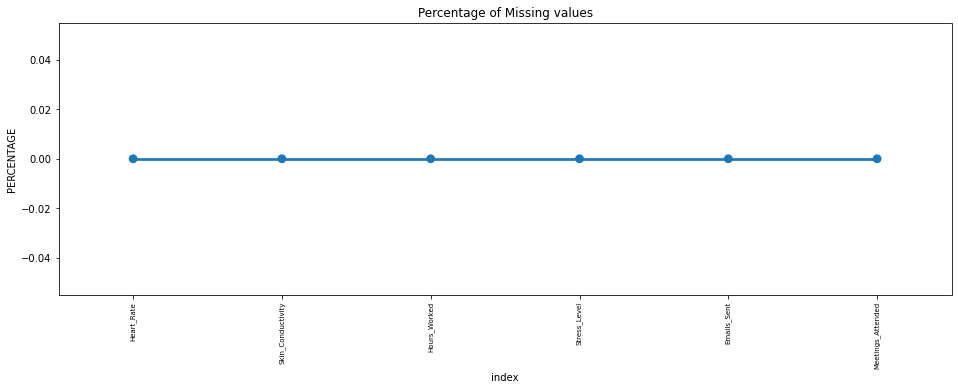

In [13]:
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

<AxesSubplot:>

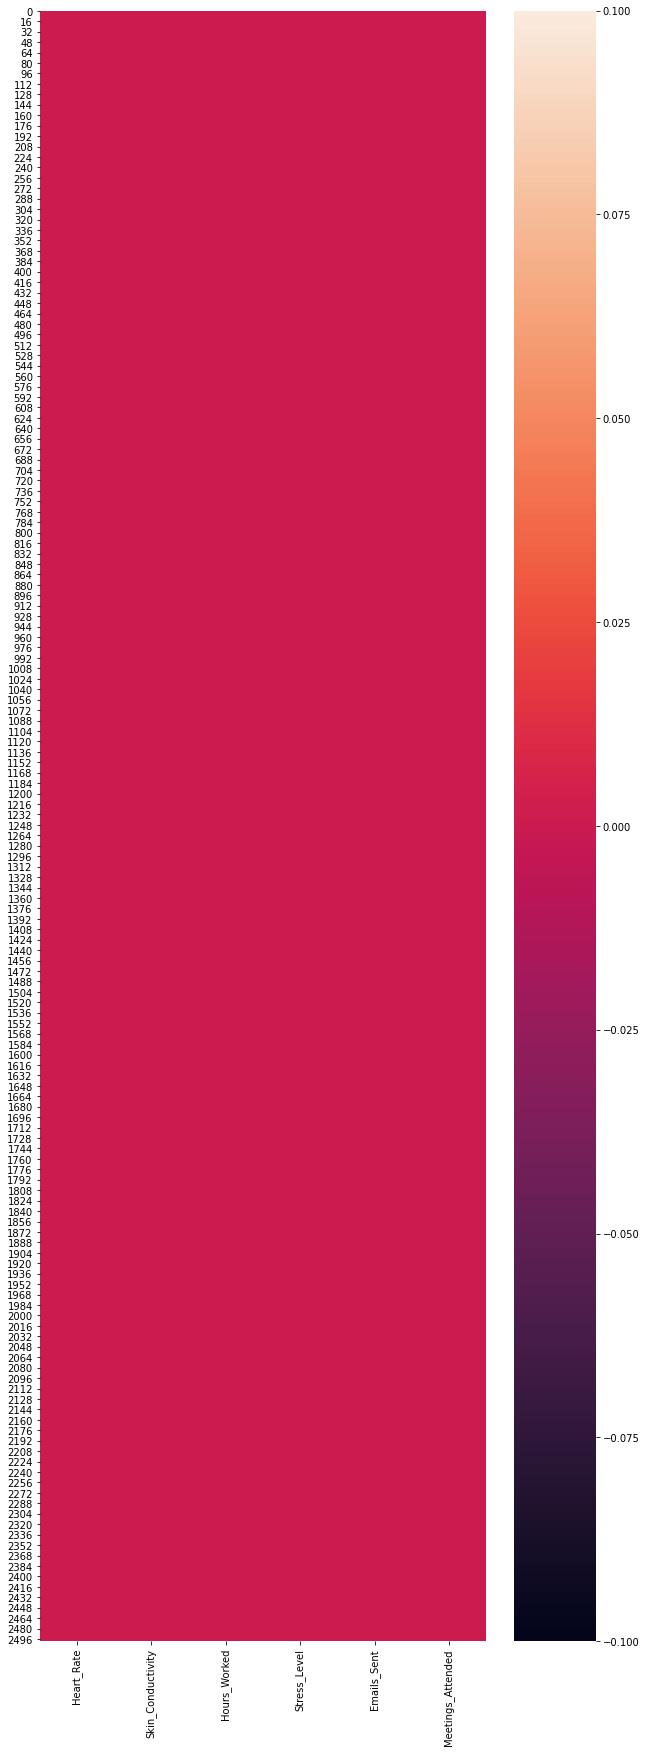

In [14]:
# Checking Null Value by plotting Heatmap
plt.figure(figsize = (10,30))
sns.heatmap(df.isnull(), cbar=True)

In [15]:
print("Here are the columnn names of our data set :")
df.columns

Here are the columnn names of our data set :


Index(['Heart_Rate', 'Skin_Conductivity', 'Hours_Worked', 'Stress_Level',
       'Emails_Sent', 'Meetings_Attended'],
      dtype='object')

<AxesSubplot:xlabel='Stress_Level', ylabel='count'>

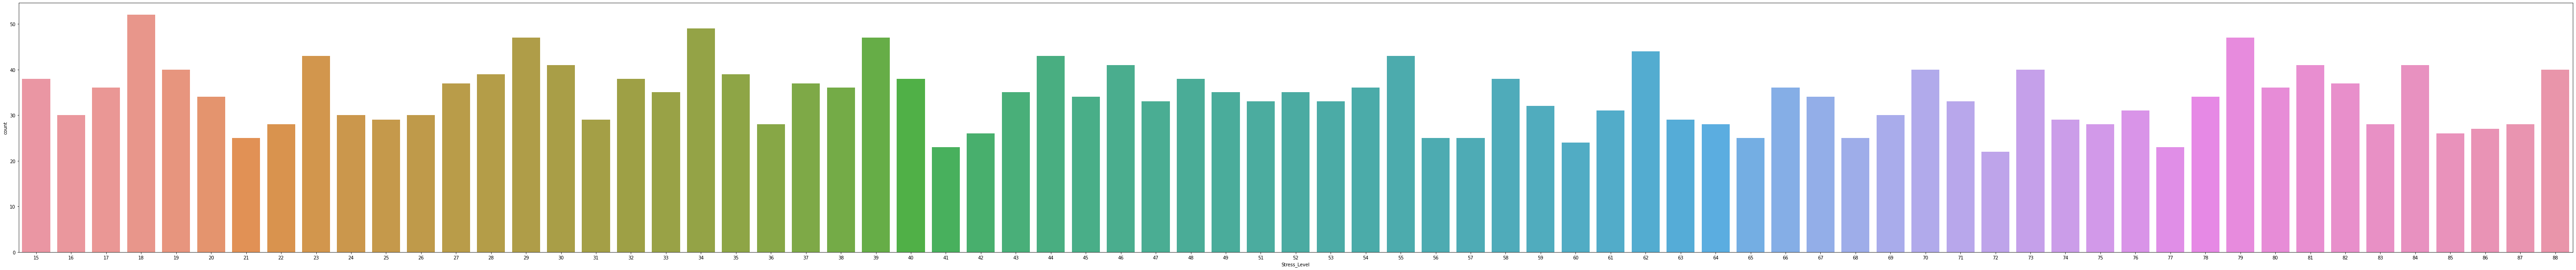

In [16]:
#let's see loan_amnt by using countplot
plt.figure(figsize = (100,10))
sns.countplot(x=df.Stress_Level)

c:\Python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 720x432 with 0 Axes>

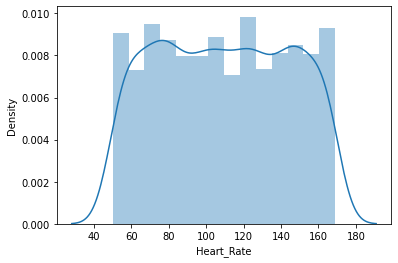

<Figure size 720x432 with 0 Axes>

In [17]:
#  distribution plot for Heart_Rate column
sns.distplot(df['Heart_Rate'])
plt.figure(figsize = (10,6))

c:\Python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 720x432 with 0 Axes>

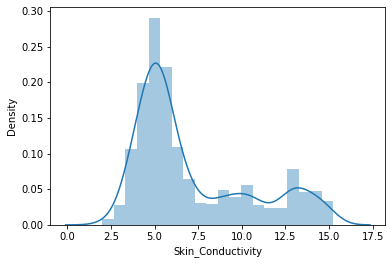

<Figure size 720x432 with 0 Axes>

In [18]:
#  distribution plot for Skin_Conductivity column
sns.distplot(df['Skin_Conductivity'])
plt.figure(figsize = (10,6))

c:\Python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 720x432 with 0 Axes>

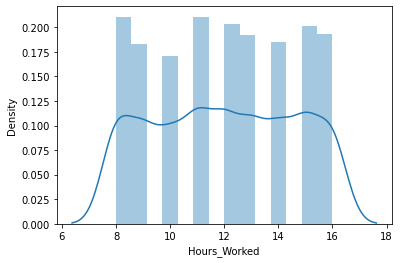

<Figure size 720x432 with 0 Axes>

In [19]:

#  distribution plot for Hours_Worked column
sns.distplot(df['Hours_Worked'])
plt.figure(figsize = (10,6))

c:\Python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 720x432 with 0 Axes>

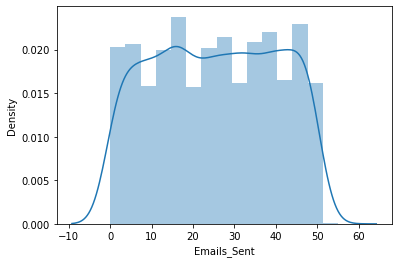

<Figure size 720x432 with 0 Axes>

In [20]:
#  distribution plot for Emails_Sent column
sns.distplot(df['Emails_Sent'])
plt.figure(figsize = (10,6))


c:\Python36\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 720x432 with 0 Axes>

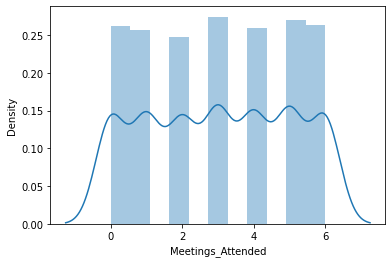

<Figure size 720x432 with 0 Axes>

In [21]:

#  distribution plot for Meetings_Attended column
sns.distplot(df['Meetings_Attended'])
plt.figure(figsize = (10,6))

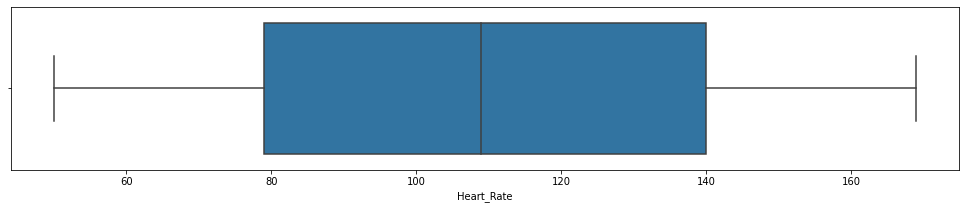

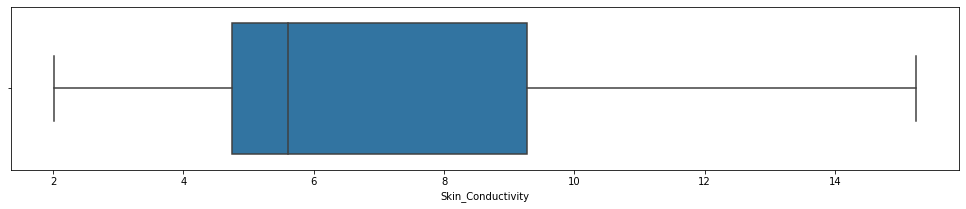

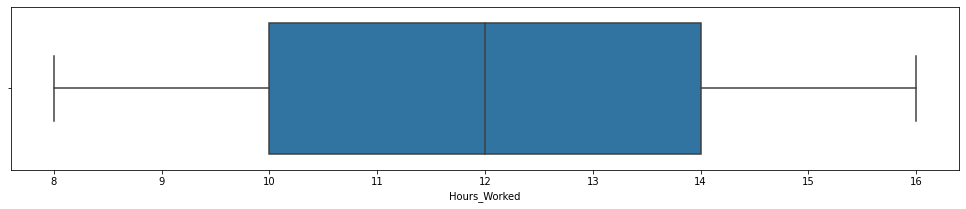

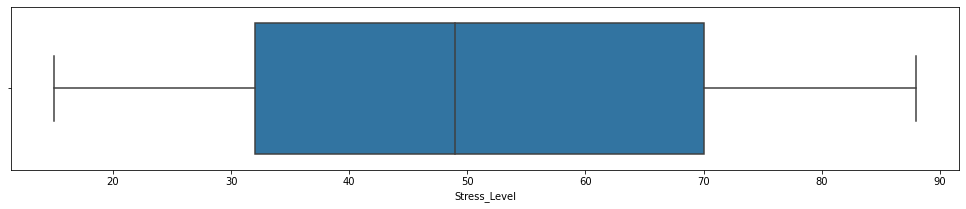

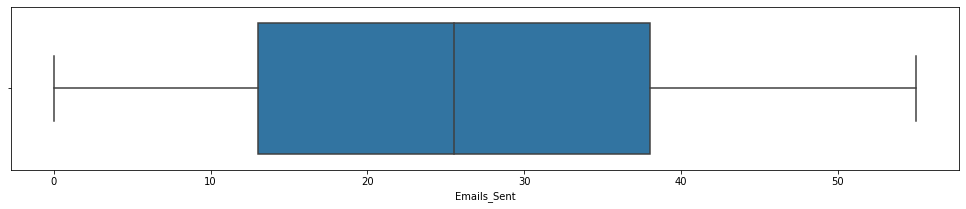

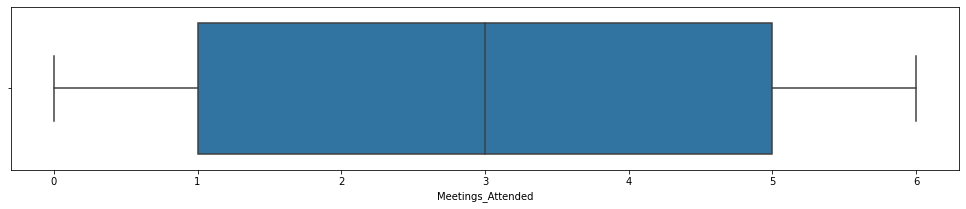

In [22]:
# Univariate Analysis
#Printing boxplot for each numerical column present in the data set
df1=df.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,3))
        sns.boxplot(data=df1, x=column)
plt.show()

<Figure size 1224x216 with 0 Axes>

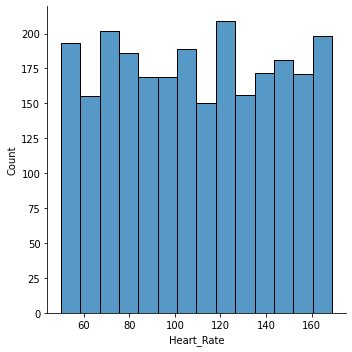

<Figure size 1224x216 with 0 Axes>

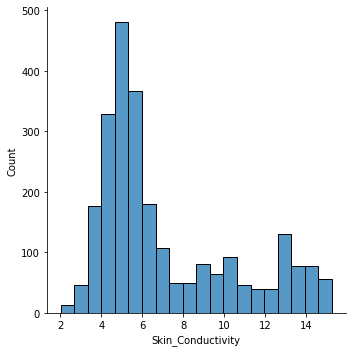

<Figure size 1224x216 with 0 Axes>

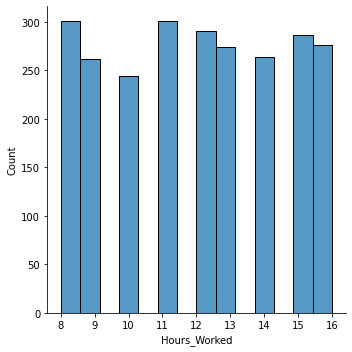

<Figure size 1224x216 with 0 Axes>

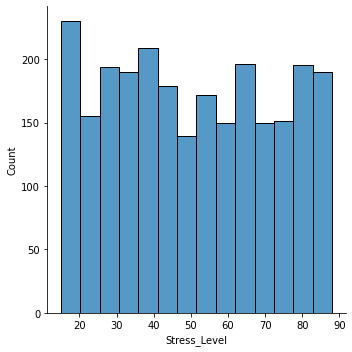

<Figure size 1224x216 with 0 Axes>

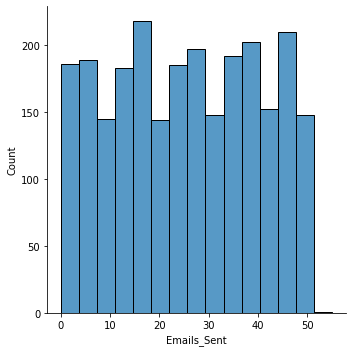

<Figure size 1224x216 with 0 Axes>

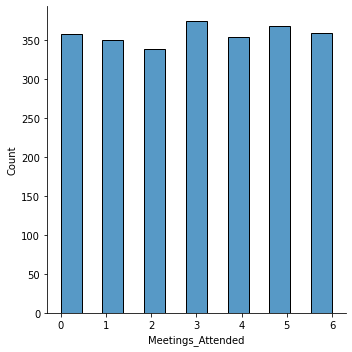

In [23]:
#Printing displot for each numerical column present in the data set
df1=df.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,3))
        sns.displot(data=df1, x=column)
plt.show()

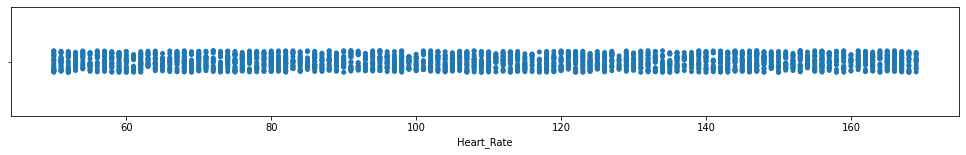

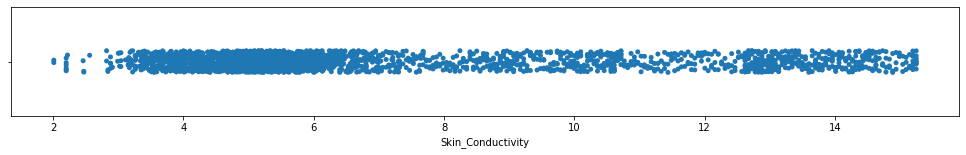

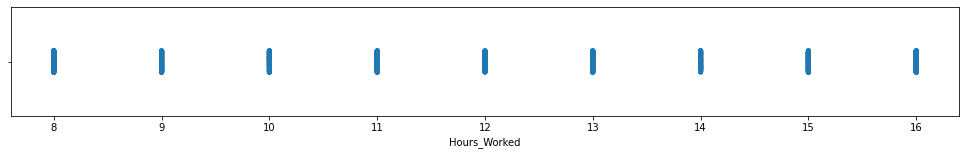

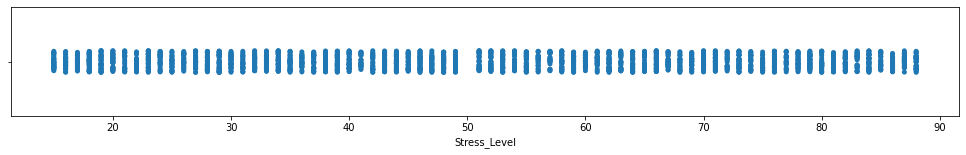

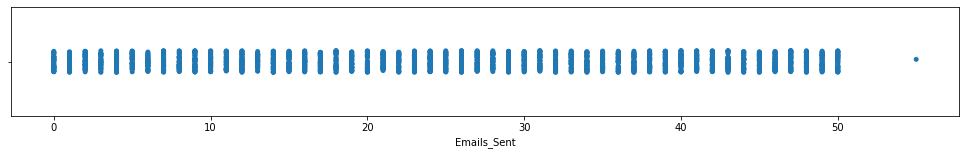

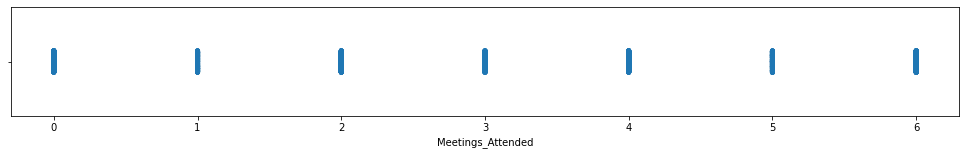

In [24]:
df1=df.select_dtypes(exclude=['object','bool'])
for column in df1:
        plt.figure(figsize=(17,2))
        sns.stripplot(data=df1, x=column)
plt.show()

c:\Python36\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\Python36\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\Python36\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
c:\Python36\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplo

array([[<AxesSubplot:title={'center':'Emails_Sent'}>,
        <AxesSubplot:title={'center':'Heart_Rate'}>],
       [<AxesSubplot:title={'center':'Hours_Worked'}>,
        <AxesSubplot:title={'center':'Meetings_Attended'}>],
       [<AxesSubplot:title={'center':'Skin_Conductivity'}>,
        <AxesSubplot:title={'center':'Stress_Level'}>]], dtype=object)

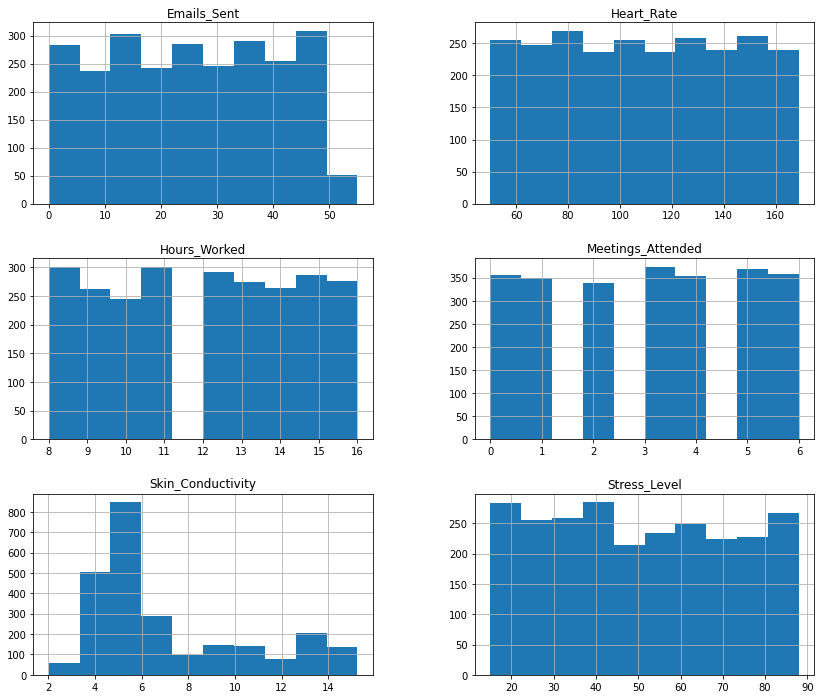

In [25]:
df.hist(figsize = (14,12)) #shows graphically the value counts of each column

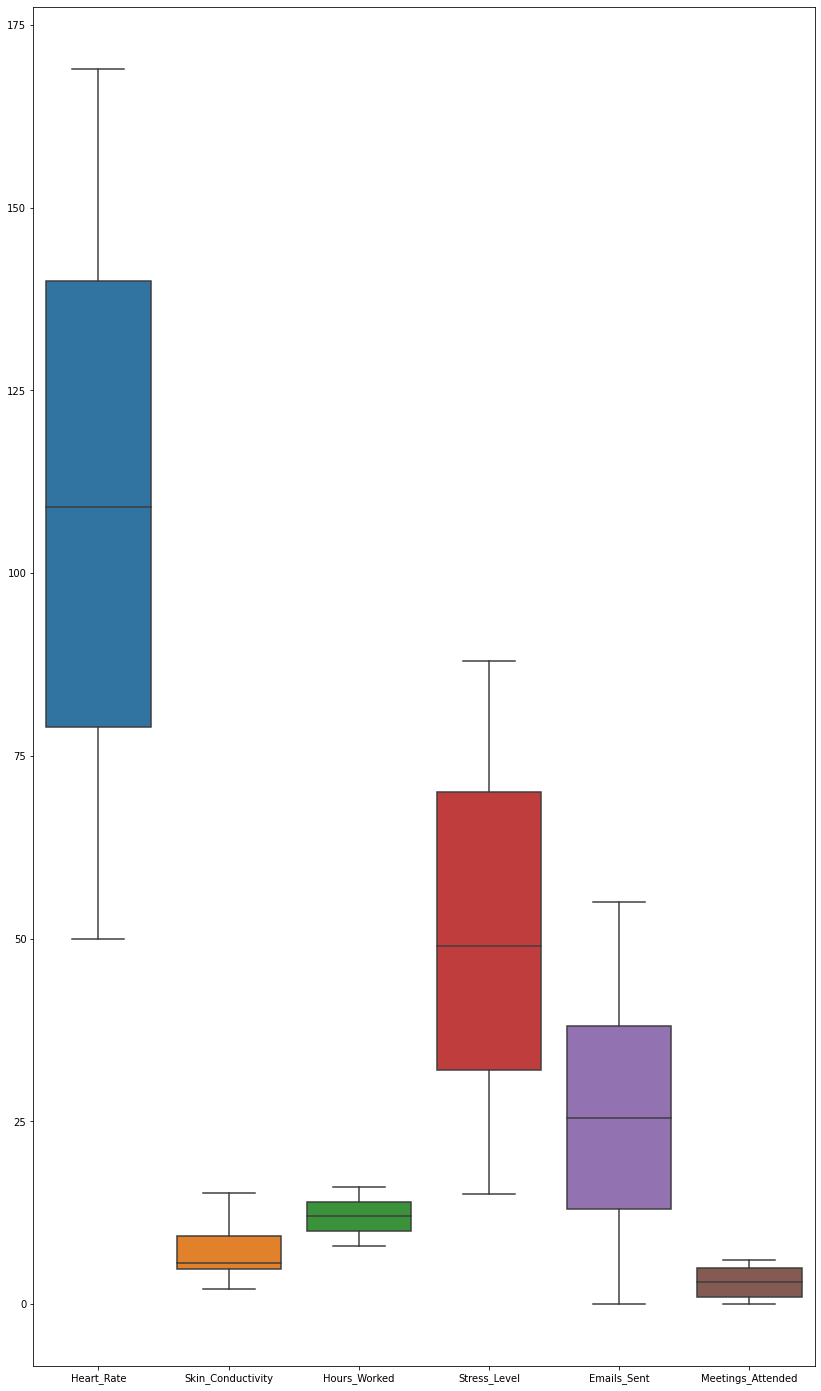

In [26]:
#box plot
plt.figure(figsize=(14,25))
ax = sns.boxplot(data=df)

# **Data Preprocessing**

<AxesSubplot:>

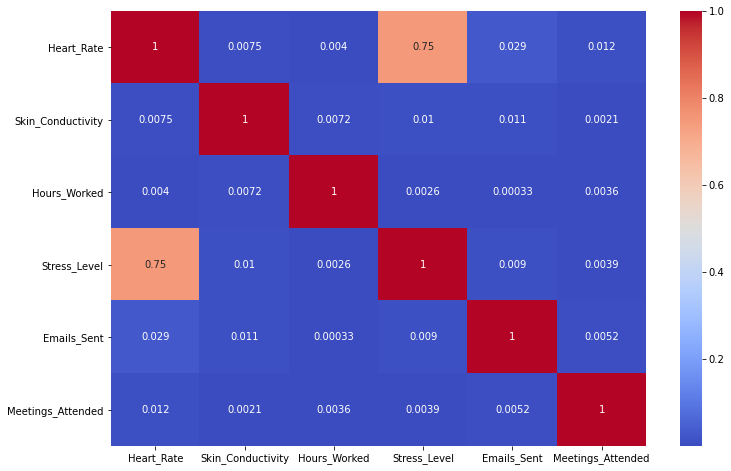

In [85]:
## plot the Correlation matrix
plt.figure(figsize=(12,8))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

#### **Splitting of data into train and test**

In [28]:
x = df.drop(['Stress_Level'], axis=1)
y = df['Stress_Level']

In [29]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,stratify=y, random_state= 42)

In [30]:
x_test

,Heart_Rate,Skin_Conductivity,Hours_Worked,Emails_Sent,Meetings_Attended
307,82,4.5300,8,46,1
2444,152,12.9825,12,43,0
988,118,3.7400,10,6,6
909,153,4.7200,13,34,0
1783,141,3.9300,9,25,0
2030,148,9.6350,8,44,6
2306,150,8.3475,8,10,6
2340,140,10.0985,13,45,2
970,154,6.2700,8,42,3
1164,50,13.2915,9,36,1


In [31]:
y_test

307     17
2444    55
988     58
909     51
1783    65
2030    63
2306    77
2340    71
970     61
1164    34
74      39
1675    29
642     77
1312    24
2102    24
2392    18
888     51
4       32
1706    19
1820    68
1499    40
258     57
274     74
1586    37
1206    66
2275    62
1016    82
2187    31
1159    19
1088    54
        ..
2349    78
1057    64
843     30
1571    49
286     53
168     15
106     33
234     55
2190    23
542     24
36      32
433     23
1135    62
2279    22
1279    70
718     86
1553    32
564     24
876     77
1263    29
1929    25
2416    56
831     69
1446    63
27      86
1562    15
740     61
309     79
170     65
148     38
Name: Stress_Level, Length: 750, dtype: int64

# **Model Building**

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# RandomForestRegressor

In [33]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [34]:
pred_rf = rf.predict(x_test)

In [35]:
rf_r2 = r2_score(pred_rf,y_test)
rf_r2

0.6644523591567107

In [36]:
rf_ma = mean_absolute_error(pred_rf,y_test)
rf_ma

9.458306666666667

In [37]:
rf_sq = mean_squared_error(pred_rf,y_test)
rf_sq

124.05960226666667

# AdaBoostRegressor

In [38]:
ad = AdaBoostRegressor()
ad.fit(x_train,y_train)

AdaBoostRegressor()

In [39]:
pred_ad = ad.predict(x_test)

In [40]:
ad_r2 = r2_score(pred_ad,y_test)
ad_r2

0.6797639421432495

In [41]:
ad_ma = mean_absolute_error(pred_ad,y_test)
ad_ma

9.18073539541237

In [42]:
ad_sq = mean_squared_error(pred_ad,y_test)
ad_sq

113.21111813824076

# ExtraTreeRegressor

In [43]:
ex = ExtraTreeRegressor()
ex.fit(x_train,y_train)

ExtraTreeRegressor()

In [44]:
pred_ex = ex.predict(x_test)

In [45]:
ex_r2 = r2_score(pred_ex,y_test)
ex_r2

0.5506226610860706

In [46]:
ex_ma = mean_absolute_error(pred_ex,y_test)
ex_ma

12.305333333333333

In [47]:
ex_sq = mean_squared_error(pred_ex,y_test)
ex_sq

231.86

# Convolutional Neural Network (CNN)

In [48]:
scaler = StandardScaler() 
scaler.fit(x_train,y_train)

StandardScaler()

In [49]:
x_train_scaled = scaler.transform(x_train)  # transform the training data
x_test_scaled = scaler.transform(x_test)  # transform the testing data
y_pred = scaler.transform(x_test)


In [72]:
print(y_train.shape)
print(y_pred.shape)



(750,)
(3750, 1)


In [73]:
y_pred = y_pred[:750]


In [74]:
print(y_train.shape)
print(y_pred.shape)


(750,)
(750, 1)


In [75]:

scaler_r2 = r2_score(y_train, y_pred)


In [76]:
scaler_sq = mean_squared_error(y_pred,y_test)
scaler_sq

3022.001146481819

In [78]:
graph5 = pd.DataFrame({
    'Models': ['Random Forest Regressor', 'AdaBoostRegressor', 'ExtraTreeRegressor', 'StandardScaler'],
    'Accuracy': [rf_r2 * 100, ad_r2 * 100, ex_r2 * 100, abs(scaler_r2) * 10]
})
graph5


,Models,Accuracy
0,Random Forest Regressor,66.445236
1,AdaBoostRegressor,67.976394
2,ExtraTreeRegressor,55.062266
3,StandardScaler,51.405070


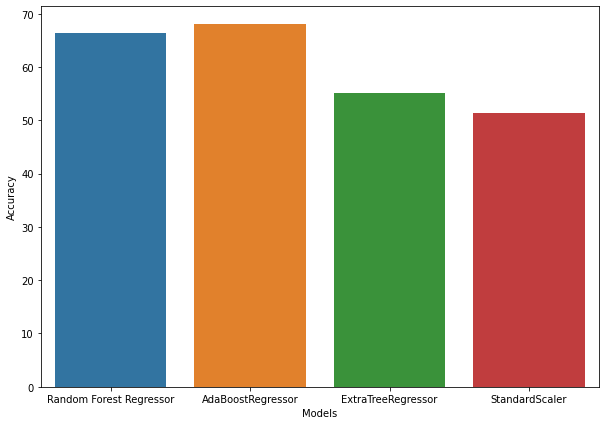

In [79]:
plt.figure(figsize = (10,7))
sns.barplot(y = graph5.Accuracy,x = graph5.Models)
plt.xticks(rotation = 'horizontal')
plt.show()

# **Prediction**

In [80]:
df

,Heart_Rate,Skin_Conductivity,Hours_Worked,Stress_Level,Emails_Sent,Meetings_Attended
0,126,5.5600,9,67,25,4
1,159,5.8900,10,69,55,5
2,64,4.5800,11,26,45,1
3,165,5.1000,14,65,19,3
4,58,5.2300,9,32,47,0
5,147,5.2000,14,64,38,5
6,105,5.5400,11,40,10,2
7,108,3.1800,15,39,17,2
8,69,4.9500,8,17,28,3
9,148,5.2400,11,83,49,6


In [83]:
abc=[139,3.69,8,30,1]
result=rf.predict([abc])
result


array([72.38])